<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Figure-1:-Demonstration-of-$f(x)$-and-$y$" data-toc-modified-id="Figure-1:-Demonstration-of-$f(x)$-and-$y$-1">Figure 1: Demonstration of $f(x)$ and $y$</a></span></li><li><span><a href="#Figure-2:-Demonstration-of-Various-Polynomial-Models-$g_D(x)$-Fit-to-Observations" data-toc-modified-id="Figure-2:-Demonstration-of-Various-Polynomial-Models-$g_D(x)$-Fit-to-Observations-2">Figure 2: Demonstration of Various Polynomial Models $g_D(x)$ Fit to Observations</a></span></li><li><span><a href="#Figure-3:-Demonstrating-High-Bias-vs-High-Variance-Situations" data-toc-modified-id="Figure-3:-Demonstrating-High-Bias-vs-High-Variance-Situations-3">Figure 3: Demonstrating High Bias vs High Variance Situations</a></span></li><li><span><a href="#Figure-4:-Simulating-Bias-variance-Tradeoff-for-Various-Model-Complexities" data-toc-modified-id="Figure-4:-Simulating-Bias-variance-Tradeoff-for-Various-Model-Complexities-4">Figure 4: Simulating Bias-variance Tradeoff for Various Model Complexities</a></span></li></ul></div>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Figure 1: Demonstration of $f(x)$ and $y$

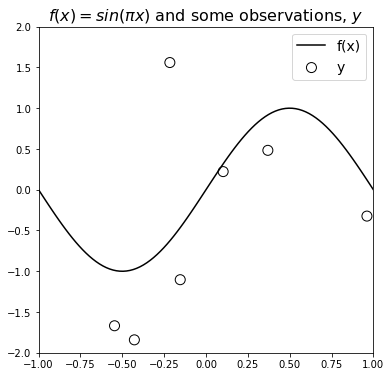

In [2]:
# Frontmatter
import numpy as np
np.random.seed(123)
MARKER_SIZE = 100
DATA_COLOR = 'black'
ERROR_COLOR = 'darkred'
POLYNOMIAL_FIT_COLORS = ['orange', 'royalblue', 'darkgreen']
LEGEND_FONTSIZE = 14
TITLE_FONTISIZE = 16
N_OBSERVATIONS = 10
NOISE_STD = 1.

x = 2 * (np.random.rand(N_OBSERVATIONS) - .5)
x_grid = np.linspace(-1, 1, 100)

def f(x):
    """Base function"""
    return np.sin(x * np.pi)

def sample_fx_data(shape, noise_std=NOISE_STD):
    return  f(x) + np.random.randn(*shape) * noise_std

def plot_fx_data(y=None):
    """Plot f(x) and noisy samples"""
    y = y if y is not None else sample_fx_data(x.shape)
    fig, axs = plt.subplots(figsize=(6, 6))
    plt.plot(x_grid, f(x_grid), color=DATA_COLOR, label='f(x)')
    plt.scatter(x, y, s=MARKER_SIZE, edgecolor=DATA_COLOR, facecolors='none', label='y')

    
    
# Plot the data
y = sample_fx_data(x.shape)
plot_fx_data(y)
plt.legend(fontsize=14)
plt.title(f'$f(x) = sin(\pi x)$ and some observations, $y$', fontsize=16)
plt.xlim([-1, 1])
plt.ylim([-2, 2])

plt.savefig('/tmp/f_x.png', dpi=300)

## Figure 2: Demonstration of Various Polynomial Models $g_D(x)$ Fit to Observations

/Users/dustinstansbury/.local/share/virtualenvs/abracadabra-IDVxsORS/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


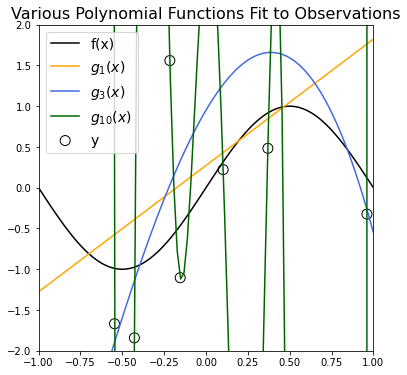

In [3]:
plot_fx_data(y)

polynomial_degrees = [1, 3, 10]
theta = {}
fit = {}
for ii, degree in enumerate(polynomial_degrees):
    # Note: we should get an overconditioned warning for degree 10 because of extreme overfitting
    theta[degree] = np.polyfit(x, y, degree)
    fit[degree] = np.polyval(theta[degree], x_grid)
    plt.plot(x_grid, fit[degree], POLYNOMIAL_FIT_COLORS[ii], label=f"$g_{{{degree}}}(x)$")
plt.legend(fontsize=LEGEND_FONTSIZE)
plt.xlim([-1, 1])
plt.ylim([-2, 2])
plt.title("Various Polynomial Functions Fit to Observations", fontsize=TITLE_FONTISIZE)

plt.savefig('/tmp/polynomial-fits.png', dpi=300)

## Figure 3: Demonstrating High Bias vs High Variance Situations

In [4]:
from collections import defaultdict

n_simulations = 50
simulation_fits = defaultdict(list)
for sim in range(n_simulations):
    # Start from same samples
    y_simulation = sample_fx_data(x.shape)
    for degree in polynomial_degrees:
        # Note: we should get an overconditioned warning for degree 10 because of extreme overfitting
        theta_tmp = np.polyfit(x, y_simulation, degree)
        simulation_fits[degree].append(np.polyval(theta_tmp, x_grid))

/Users/dustinstansbury/.local/share/virtualenvs/abracadabra-IDVxsORS/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/dustinstansbury/.local/share/virtualenvs/abracadabra-IDVxsORS/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/dustinstansbury/.local/share/virtualenvs/abracadabra-IDVxsORS/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/dustinstansbury/.local/share/virtualenvs/abracadabra-IDVxsORS/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/dustinstansbury/.local/share/virtualenvs/abracadabra-

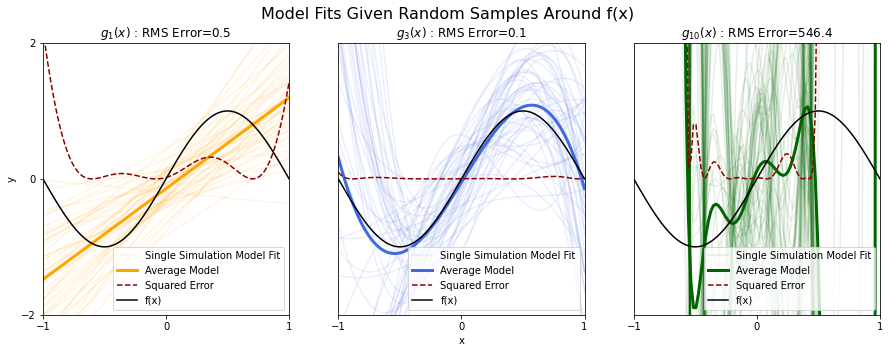

In [5]:
def error_function(pred, actual):
    return (pred - actual) ** 2

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for ii, degree in enumerate(polynomial_degrees):
    plt.sca(axs[ii])
    for jj, fit in enumerate(simulation_fits[degree]):
        label = 'Single Simulation Model Fit' if jj == 0 else None
        plt.plot(x_grid, fit, color=POLYNOMIAL_FIT_COLORS[ii], alpha=.1, label=label)
    
    average_fit = np.array(simulation_fits[degree]).mean(0)
    squared_error = error_function(average_fit, f(x_grid))
    rms = np.sqrt(mean(squared_error))
    plt.plot(x_grid, average_fit, color=POLYNOMIAL_FIT_COLORS[ii], linewidth=3, label='Average Model')
    plt.plot(x_grid, squared_error, '--', color=ERROR_COLOR, label='Squared Error')
    plt.plot(x_grid, f(x_grid), color='black', label='f(x)')
    plt.yticks([])
    if ii == 1:
        plt.xlabel('x')
    elif ii == 0:
        plt.ylabel('y')
        plt.yticks([-2, 0, 2])

    plt.xlim([-1, 1])
    plt.ylim([-2, 2])
    plt.xticks([-1, 0, 1])
    plt.title(f"$g_{{{degree}}}(x)$ : RMS Error={np.round(rms, 1)}")
    plt.legend(loc='lower right')
plt.suptitle('Model Fits Given Random Samples Around f(x)', fontsize=TITLE_FONTISIZE)
plt.savefig('/tmp/polynomial-simualtion-fits.png', bbox_inches='tight', dpi=300)

## Figure 4: Simulating Bias-variance Tradeoff for Various Model Complexities

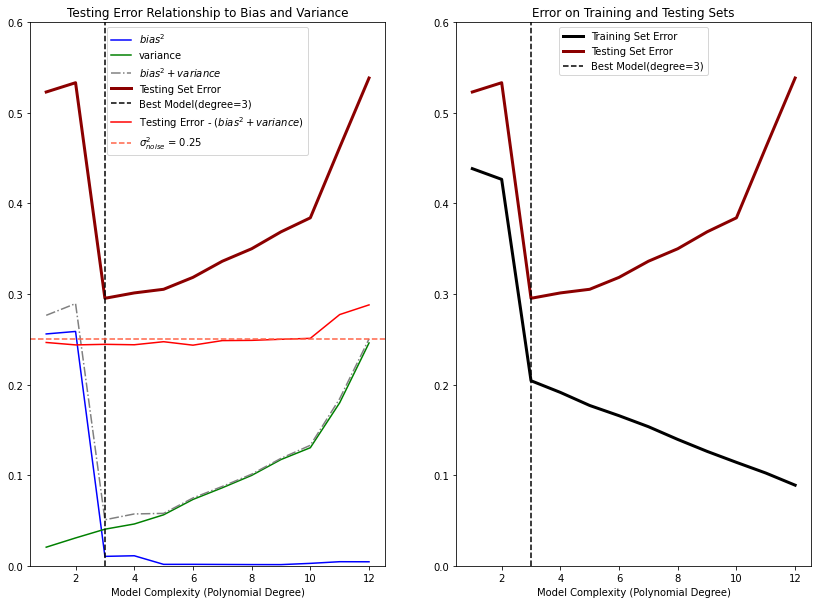

In [6]:
np.random.seed(124)
n_observations_per_dataset = 25
n_datasets = 100
max_poly_degree = 12  # Maximum model complexity
model_poly_degrees = range(1, max_poly_degree+1)

NOISE_STD = .5
percent_train = .8
n_train = int(np.ceil(n_observations_per_dataset * percent_train))

# Create training/testing inputs
x = np.linspace(-1, 1, n_observations_per_dataset)
x = np.random.permutation(x)
x_train = x[:n_train]
x_test = x[n_train:]

# logging variables
theta_hat = defaultdict(list)

pred_train = defaultdict(list)
pred_test = defaultdict(list)

train_errors = defaultdict(list)
test_errors = defaultdict(list)

for dataset in range(n_datasets):

    # Simulate training/testing targets
    y_train = f(x_train) + NOISE_STD * np.random.randn(*x_train.shape)
    y_test = f(x_test) + NOISE_STD * np.random.randn(*x_test.shape)
    
    for degree in model_poly_degrees:
        # Train model
        tmp_theta_hat = polyfit(x_train, y_train, degree)
        
        # Make predictions on train set
        tmp_pred_train = polyval(tmp_theta_hat, x_train)
        pred_train[degree].append(tmp_pred_train)
        
        # Test predictions
        tmp_pred_test = polyval(tmp_theta_hat, x_test)
        pred_test[degree].append(tmp_pred_test)
        
        # Mean Squared Error for train and test sets
        train_errors[degree].append(np.mean(error_function(tmp_pred_train, y_train)))
        test_errors[degree].append(np.mean(error_function(tmp_pred_test, y_test)))

        
def calculate_estimator_bias_squared(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]

    # (E[g(x)] - f(x))^2, averaged across all trials
    return np.mean((average_model_prediction - f(x_test)) ** 2)


def calculate_estimator_variance(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]

    # (g(x) - E[g(x)])^2, averaged across all trials
    return np.mean((pred_test - average_model_prediction) ** 2)

complexity_train_error = []
complexity_test_error = []
bias_squared = []
variance = []
for degree in model_poly_degrees:
    complexity_train_error.append(np.mean(train_errors[degree]))
    complexity_test_error.append(np.mean(test_errors[degree]))
    bias_squared.append(calculate_estimator_bias_squared(pred_test[degree]))
    variance.append(calculate_estimator_variance(pred_test[degree]))

best_model_degree = model_poly_degrees[np.argmin(complexity_test_error)]


# Visualizations
fig, axs = plt.subplots(1, 2, figsize=(14, 10))

## Plot Bias^2 + variance
plt.sca(axs[0])
plt.plot(model_poly_degrees, bias_squared, color='blue', label='$bias^2$')
plt.plot(model_poly_degrees, variance, color='green', label='variance')
plt.plot(model_poly_degrees, np.array(bias_squared) + np.array(variance),  linestyle='-.', color='gray', label='$bias^2 + variance$')
plt.plot(model_poly_degrees, complexity_test_error, label='Testing Set Error', linewidth=3, color=ERROR_COLOR)
plt.axvline(best_model_degree, linestyle='--', color='black', label=f'Best Model(degree={best_model_degree})')
plt.plot(model_poly_degrees, np.array(complexity_test_error) - (np.array(bias_squared) + np.array(variance)), color='red', label='Testing Error - ($bias^2 + variance$)')
plt.axhline(NOISE_STD **2, color='tomato', linestyle='--', label=f'$\sigma_{{noise}}^2$ = {round(NOISE_STD**2, 3)}')

plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylim([0, .6]);
plt.legend()
plt.title('Testing Error Relationship to Bias and Variance')

## Plot Train / Test Set Error
plt.sca(axs[1])
plt.plot(model_poly_degrees, complexity_train_error, label='Training Set Error', linewidth=3, color=DATA_COLOR)
plt.plot(model_poly_degrees, complexity_test_error, label='Testing Set Error', linewidth=3, color=ERROR_COLOR)
plt.axvline(best_model_degree, linestyle='--', color='black', label=f'Best Model(degree={best_model_degree})')
plt.ylim([0, .6]);
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.title('Error on Training and Testing Sets')
plt.legend(loc='upper center')

plt.savefig('/tmp/bias-variance-tradeoff.png', bbox_inches='tight', dpi=300)